# Classification and Regression Trees (CART)
*By Cristian Leo*

*Article Link:* https://medium.com/@cristianleo120/classification-and-regression-trees-cart-implementation-from-scratch-in-python-89efa31ad9a6

## Introduction

**Classification and Regression Trees (CART)** emerge as a pivotal algorithm in the landscape of machine learning, navigating both classification and regression tasks. Well-known for its elegance, interpretability, and remarkable accuracy, CART has cemented its popularity as an algorithm of choice. This sophisticated decision tree approach holds the key to complex datasets, offering a mix of simplicity and precision that sets it apart in the realm of predictive modeling. In this article, we delve into the inner workings of CART, unraveling its recursive journey of data partitioning, impurity minimization, and predictive power.

## How CART works

CART works by recursively splitting the data into smaller and smaller subsets based on the values of the input features. The split is chosen to minimize the impurity of the subsets, which is measured using the Gini index.

**Gini Index Formula:**

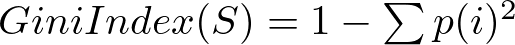

Where:
- \( S \) is the subset of data.
- \( p(i) \) is the proportion of data points in \( S \) that belong to class \( i \).

The Gini index is zero for a perfectly pure subset and highest for a perfectly impure subset.

CART recursively splits the data until a stopping criterion is met, which can be based on the purity of the subsets, the size of the subsets, or the depth of the tree. Once the tree is built, it can be used to make predictions on new data points by traversing the tree from the root node to a leaf node.

## Assumptions of CART

CART makes the following assumptions:
1. The data is independent and identically distributed (i.i.d.).
2. The features are all independent of each other.
3. The target variable is categorical for classification tasks and continuous for regression tasks.

Additional assumptions often made include balanced data, scaled features, and data free of outliers.

## Benefits of CART

**Simplicity:**
- CART is a relatively simple algorithm to understand and implement.

**Interpretability:**
- CART trees are easy to interpret, visualized as a series of if-then statements.

**Accuracy:**
- CART trees can achieve high accuracy on a variety of tasks, learning complex relationships.

**Robustness:**
- CART trees are relatively robust to noise and outliers in the data.

**Versatility:**
- CART trees can be used for both classification and regression tasks.

## Pitfalls of CART

**Overfitting:**
- CART trees are prone to overfitting; cross-validation and hyperparameter tuning are crucial.

**Computational complexity:**
- Training CART trees can be computationally expensive, especially for large datasets.

**Sensitivity to outliers:**
- CART trees can be sensitive to outliers; robust CART variants or outlier removal can be considered.

## Tips for using CART

1. **Use a cross-validation technique:**
   - Evaluate the performance of the CART model on unseen data.

2. **Tune the hyperparameters:**
   - Adjust the minimum node size and minimum leaf size using grid search or random search.

3. **Use a pruning technique:**
   - Implement pruning techniques to prevent overfitting; reduced error pruning is a good option.


## **Import Required Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

## **Create CART from Scratch**

In [2]:
class CART:
    def __init__(self, min_node_size=1, min_leaf_size=1):
        self.min_node_size = min_node_size
        self.min_leaf_size = min_leaf_size

    def fit(self, X, y):
        # Calculate the Gini index of the root node.
        gini = self.gini_index(y)
        # Build the CART tree recursively.
        self.tree = self._build_tree(X, y, gini)

    def predict(self, X):
        # Make predictions for the new data points.
        predictions = []
        for x in X:
            prediction = self.predict_one(x)
            predictions.append(prediction)
        return predictions
    
    def gini_index(self, y):
        # Calculate the Gini index of the given dataset.
        # Count the number of data points in each class.
        class_counts = np.bincount(y)
        # Calculate the proportion of data points in each class.
        class_proportions = class_counts / len(y)
        # Calculate the Gini index.
        gini = 1 - np.sum(class_proportions**2)
        return gini
    
    def _find_best_split(self, X, y):
        # Initialize the best split.
        best_split = None
        best_gini = 1
        # Iterate over all features.
        for i in range(X.shape[1]):
            # Iterate over all possible splits.
            for split in self._find_splits(X[:, i]):
                # Split the data.
                left_X, left_y = X[split[0]], y[split[0]]
                right_X, right_y = X[~split[0]], y[~split[0]]
                # Calculate the Gini index of the split.
                gini = self.gini_index(left_y) * len(left_y) / len(y) + self.gini_index(right_y) * len(right_y) / len(y)
                # Update the best split if necessary.
                if gini < best_gini:
                    best_split = (i, split[1], split[0])
                    best_gini = gini
        return best_split

    def _build_tree(self, X, y, gini):
        # If the node is pure, then return a leaf node.
        if gini == 0 or len(X) < self.min_node_size:
            return CARTLeaf(y)
        # Find the best split to minimize the Gini index.
        best_split = self._find_best_split(X, y)
        # Split the data into left and right child nodes.
        left_X, left_y = X[best_split[2]], y[best_split[2]]
        right_X, right_y = X[~best_split[2]], y[~best_split[2]]
        # Build the left and right child nodes recursively.
        left_child = self._build_tree(left_X, left_y, self.gini_index(left_y))
        right_child = self._build_tree(right_X, right_y, self.gini_index(right_y))
        # Return a CARTNode with the best split and the left and right child nodes.
        return CARTNode(best_split, left_child, right_child)
    
    def _find_splits(self, x):
        # Find all possible splits for the given feature.
        # Sort the feature values.
        sorted_x = np.sort(x)
        # Find the midpoints between adjacent feature values.
        midpoints = (sorted_x[1:] + sorted_x[:-1]) / 2
        # Iterate over all midpoints.
        for midpoint in midpoints:
            # Find the indices of the data points to the left and right of the midpoint.
            left = x < midpoint
            right = x >= midpoint
            # Yield the indices of the data points to the left and right of the midpoint.
            yield (left, midpoint, right)
    
    def predict_one(self, x):
        # Traverse the CART tree to make a prediction for the given data point.
        node = self.tree
        while not isinstance(node, CARTLeaf):
            split = node.split
            if x[split[0]] < split[1]:  # Change this line
                node = node.left
            else:
                node = node.right
        return node.prediction
    
class CARTNode:
    def __init__(self, split, left, right):
        self.split = split
        self.left = left
        self.right = right
        
class CARTLeaf:
    def __init__(self, y):
        self.prediction = np.argmax(np.bincount(y))

## **Load Digits Dataset**

In [3]:
# Load the digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Ensure y is a numpy array
y = np.array(y)

# Ensure y is one-dimensional
if y.ndim != 1:
    y = np.squeeze(y)

# Ensure y contains non-negative integers
y = y.astype(int)

## **Plot Digits**

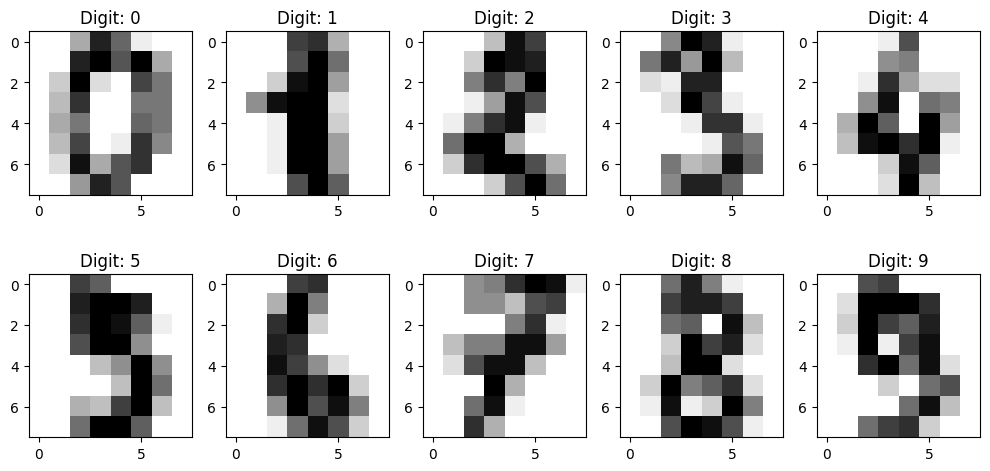

In [4]:
# Display the first few images in the dataset
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.images[i], cmap=plt.cm.gray_r)
    ax.set_title(f"Digit: {digits.target[i]}")
plt.tight_layout()
plt.show()

## **Plot Average**

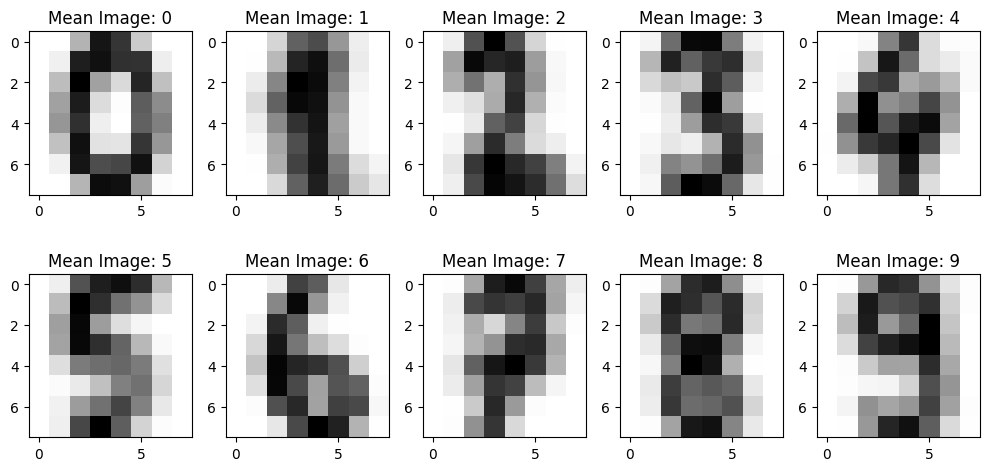

In [5]:
# Visualize the mean image for each digit
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.ravel()):
    mean_image = digits.images[digits.target == i].mean(axis=0)
    ax.imshow(mean_image, cmap=plt.cm.gray_r)
    ax.set_title(f"Mean Image: {i}")
plt.tight_layout()
plt.show()

## **Plot Distributions**

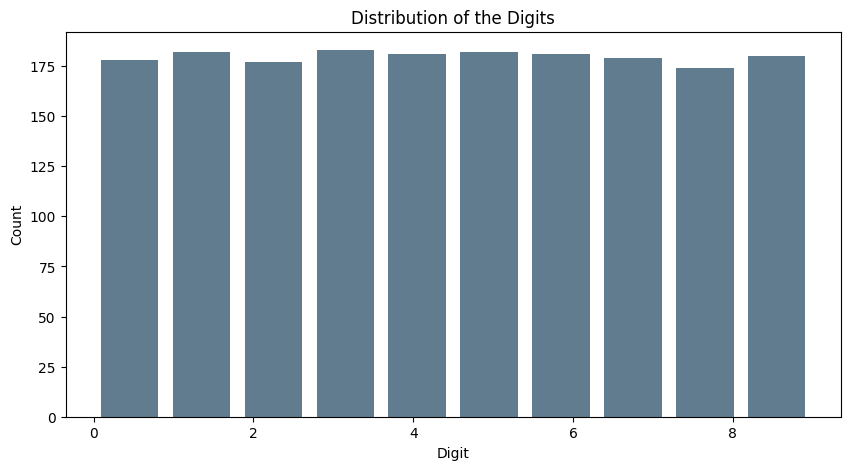

In [6]:
# Display the distribution of the classes in the dataset
plt.figure(figsize=(10, 5))
plt.hist(digits.target, bins=10, rwidth=0.8, color='#607c8e')
plt.title('Distribution of the Digits')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

## **Fit & Predict**

In [7]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree Classifier model
dt_model = CART(min_node_size=5, min_leaf_size=5)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Use the trained model to make predictions on the test data
predictions = dt_model.predict(X_test)

# Accuracy of the model
from sklearn.metrics import accuracy_score
print(f"Test Accuracy: {accuracy_score(y_test, predictions):.2%}")

Test Accuracy: 87.22%
